### **Importing Libraries**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

### **->Loading Dataset**

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

**Summary of Each Dataset**

In [15]:
def data_summary(df, name):
    print(f"--- {name} ---")
    print("Shape:", df.shape)
    print("Columns with Null Values:\n", df.isnull().sum())
    print("Duplicate Rows:", df.duplicated().sum())
    print("\n")

In [16]:
data_summary(customers, "Customers")
data_summary(products, "Products")
data_summary(transactions, "Transactions")

--- Customers ---
Shape: (200, 4)
Columns with Null Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Duplicate Rows: 0


--- Products ---
Shape: (100, 4)
Columns with Null Values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Duplicate Rows: 0


--- Transactions ---
Shape: (1000, 7)
Columns with Null Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
Duplicate Rows: 0




From the summary it is conclusive that there's no duplicate row or missing value in each of the dataset.

In [17]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [18]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [19]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


### **->Data Insights**

In [21]:
merged_data = transactions.merge(products, on="ProductID").merge(customers, on="CustomerID")

In [22]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


#### **1. Most Popular Product Categories**

Most Popular Product Categories:
 Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


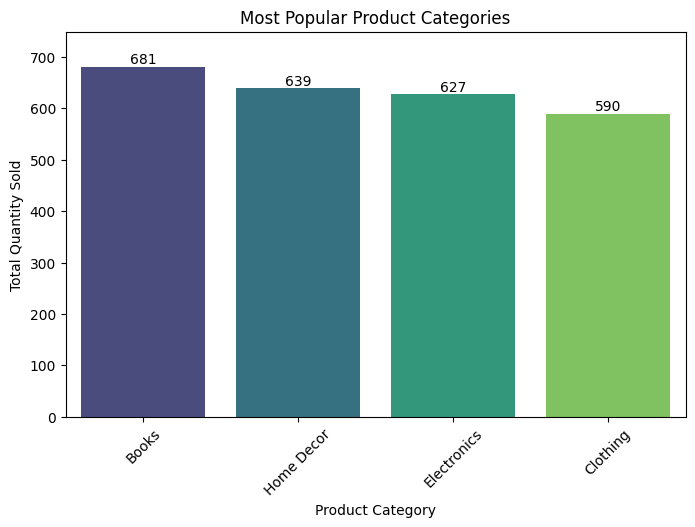

In [41]:
category_sales = merged_data.groupby("Category")["Quantity"].sum().sort_values(ascending=False)
print("Most Popular Product Categories:\n", category_sales)

plt.figure(figsize=(8, 5))
graph = sns.barplot(x=category_sales.index, y=category_sales.values, hue=category_sales.index, legend=False, palette="viridis")

for i, v in enumerate(category_sales.values):
    graph.text(i, v, str(round(v)), ha='center', va='bottom', fontsize=10)
graph.set_ylim(0, max(category_sales.values) * 1.1)

plt.title("Most Popular Product Categories")
plt.ylabel("Total Quantity Sold")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()

#### **2. Regions Contributing to Maximum Revenue**

Regions Contributing to Maximum Revenue:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


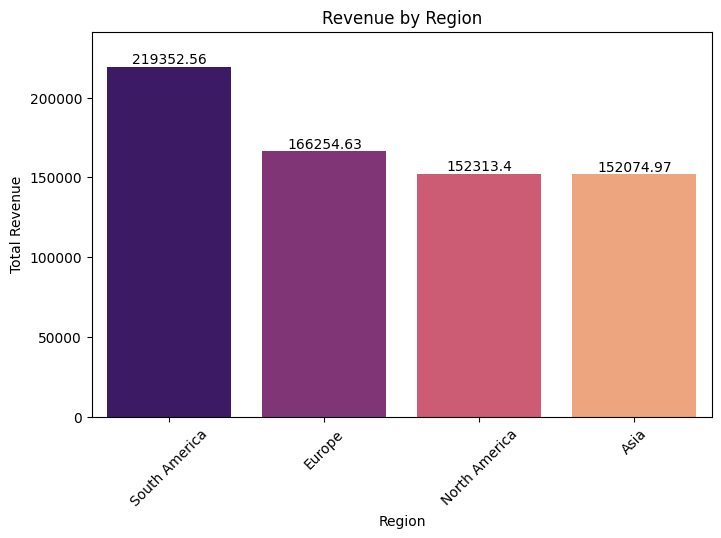

In [44]:
region_revenue = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Regions Contributing to Maximum Revenue:\n", region_revenue)

plt.figure(figsize=(8, 5))
graph = sns.barplot(x=region_revenue.index, y=region_revenue.values, hue=region_revenue.index, legend=False,  palette="magma")

for i, v in enumerate(region_revenue.values):
    graph.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
graph.set_ylim(0, max(region_revenue.values) * 1.1)

plt.title("Revenue by Region")
plt.ylabel("Total Revenue")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

#### **3. Top 10 High-Revenue Customers**


Top 10 High-Revenue Customers:
 CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


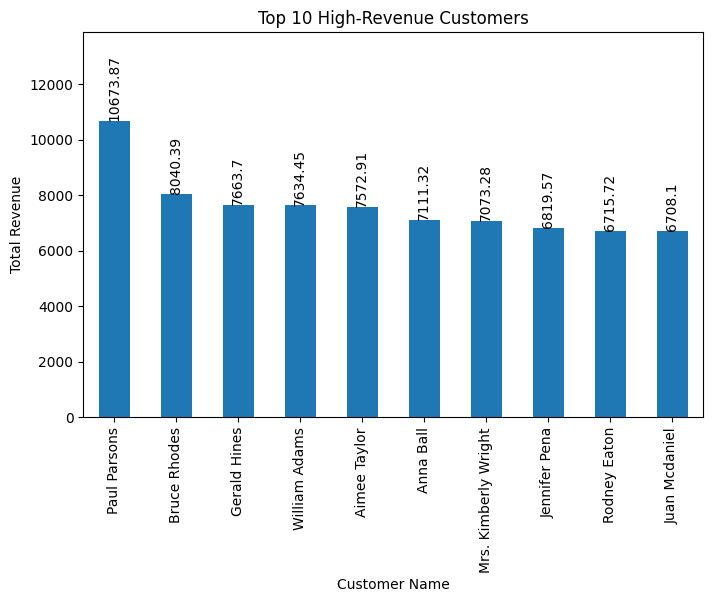

In [58]:
customer_revenue = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 High-Revenue Customers:\n", customer_revenue)

plt.figure(figsize=(8, 5))
graph = customer_revenue.plot(kind="bar")

for i, v in enumerate(customer_revenue.values):
    graph.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10, rotation=90)
graph.set_ylim(0, max(customer_revenue.values) * 1.3)

plt.title("Top 10 High-Revenue Customers")
plt.ylabel("Total Revenue")
plt.xlabel("Customer Name")
plt.xticks(rotation=90)
plt.show()

#### **4. Seasonal Trends in Transactions**

Seasonal Trends in Transactions:
 January      107
February      77
March         80
April         86
May           86
June          69
July          96
August        94
September     96
October       70
November      57
December      82
Name: count, dtype: int64


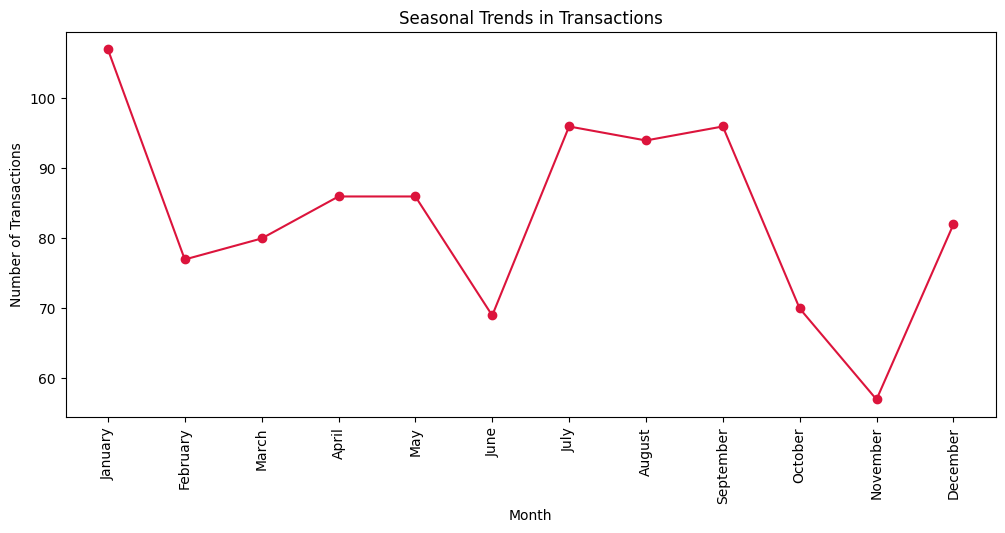

In [72]:
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
monthly_trends = merged_data["TransactionDate"].dt.month.value_counts().sort_index()

monthly_trends.index = [calendar.month_name[month] for month in monthly_trends.index]

print("Seasonal Trends in Transactions:\n", monthly_trends)

plt.figure(figsize=(12, 5))
monthly_trends.plot(kind="line", marker="o", color="crimson")
plt.title("Seasonal Trends in Transactions")
plt.ylabel("Number of Transactions")
plt.xlabel("Month")
plt.xticks(range(len(monthly_trends.index)), monthly_trends.index, rotation=90)
plt.show()

#### **5. Customer Distribution over Regions**

Number of Customers by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


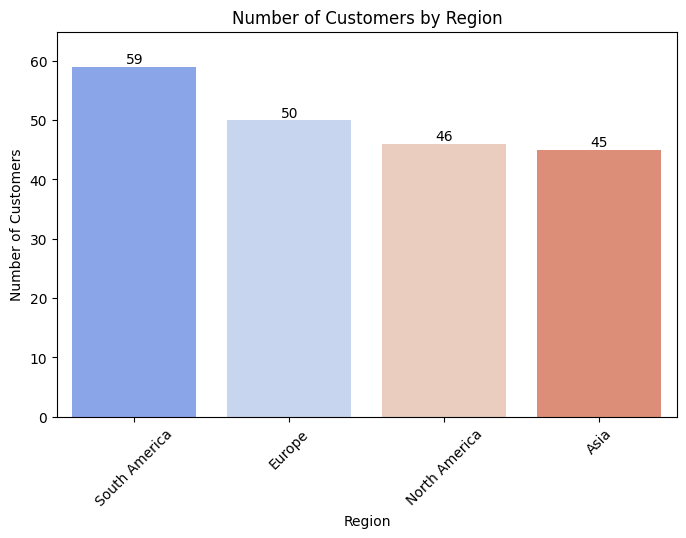

In [74]:
region_customer_count = customers["Region"].value_counts()
print("Number of Customers by Region:\n", region_customer_count)

plt.figure(figsize=(8, 5))
graph = sns.barplot(x=region_customer_count.index, y=region_customer_count.values, hue=region_customer_count.index, legend=False, palette="coolwarm")

for i, v in enumerate(region_customer_count.values):
    graph.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
graph.set_ylim(0, max(region_customer_count.values) * 1.1)

plt.title("Number of Customers by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()